# Stock Market Prediction using Numerical and Textual Analysis


## Problem Statement:
Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
## Credits:Saya Vamshi Krishna

###  Step1:-- Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step2:-- Importing the Data-Set

In [4]:
news_df = pd.read_csv('india-news-headlines.csv')

In [5]:
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [6]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [7]:
news_df['Date'] = pd.to_datetime(news_df['publish_date'], format = '%Y%m%d')
news_df.drop('publish_date',axis = 1, inplace = True)

In [8]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   headline_category  object        
 1   headline_text      object        
 2   Date               datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 83.6+ MB


In [9]:
news_df.isna().sum()

headline_category    0
headline_text        0
Date                 0
dtype: int64

In [10]:
news_df.head()

,headline_category,headline_text,Date
0,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
2,unknown,America's unwanted heading for India?,2001-01-02
3,unknown,For bigwigs; it is destination Goa,2001-01-02
4,unknown,Extra buses to clear tourist traffic,2001-01-02


In [11]:
news_df.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
news_df['headline_text']

0          Status quo will not be disturbed at Ayodhya  s...
1                        Fissures in Hurriyat over Pak visit
2                      America's unwanted heading for India 
3                         For bigwigs  it is destination Goa
4                       Extra buses to clear tourist traffic
                                 ...                        
3650965    J K sacks   cops    other employees over terro...
3650966    Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967    As Covid    cases drop to nil in southern dist...
3650968    Tamil Nadu sees marginal rise of Covid cases w...
3650969    Tamil Nadu sees marginal rise of Covid cases w...
Name: headline_text, Length: 3650970, dtype: object

In [12]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
%%time
polarity = []
subjectivity = []

for headlines in news_df['headline_text']:
    blob = TextBlob(headlines)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)

CPU times: user 2min 34s, sys: 1.39 s, total: 2min 35s
Wall time: 2min 40s


In [14]:
news_df['polarity'] = polarity
news_df['subjectivity'] = subjectivity

In [15]:
news_df.head(3)

,headline_category,headline_text,Date,polarity,subjectivity
0,unknown,Status quo will not be disturbed at Ayodhya s...,2001-01-02,0.0,0.0
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02,0.0,0.0
2,unknown,America's unwanted heading for India,2001-01-02,0.0,0.0


In [16]:
print('Reviews with Negative Sentiment based on Polarity:', len(news_df[news_df['polarity'] < 0]))
print('Reviews with Neutral Sentiment based on Polarity:', len(news_df[news_df['polarity'] == 0]))
print('Reviews with Positive Sentiment based on Polarity:', len(news_df[news_df['polarity'] > 0]))

Reviews with Negative Sentiment based on Polarity: 450031
Reviews with Neutral Sentiment based on Polarity: 2481870
Reviews with Positive Sentiment based on Polarity: 719069


In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
#Adding sentiment score to news
sentiment_int = SentimentIntensityAnalyzer()
news_df['Compound'] = [sentiment_int.polarity_scores(v)['compound'] for v in news_df['headline_text']]

In [20]:
news_df['Negative'] = [sentiment_int.polarity_scores(v)['neg'] for v in news_df['headline_text']]

In [22]:
news_df['Neutral'] = [sentiment_int.polarity_scores(v)['neu'] for v in news_df['headline_text']]

In [23]:
news_df['Positive'] = [sentiment_int.polarity_scores(v)['pos'] for v in news_df['headline_text']]

In [24]:
news_df.head()

,headline_category,headline_text,Date,polarity,subjectivity,Compound,Negative,Neutral,Positive
0,unknown,Status quo will not be disturbed at Ayodhya s...,2001-01-02,0.00,0.000000,0.2924,0.000,0.805,0.195
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02,0.00,0.000000,0.0000,0.000,1.000,0.000
2,unknown,America's unwanted heading for India,2001-01-02,0.00,0.000000,-0.2263,0.322,0.678,0.000
3,unknown,For bigwigs it is destination Goa,2001-01-02,0.00,0.000000,0.0000,0.000,1.000,0.000
4,unknown,Extra buses to clear tourist traffic,2001-01-02,0.05,0.241667,0.3818,0.000,0.658,0.342


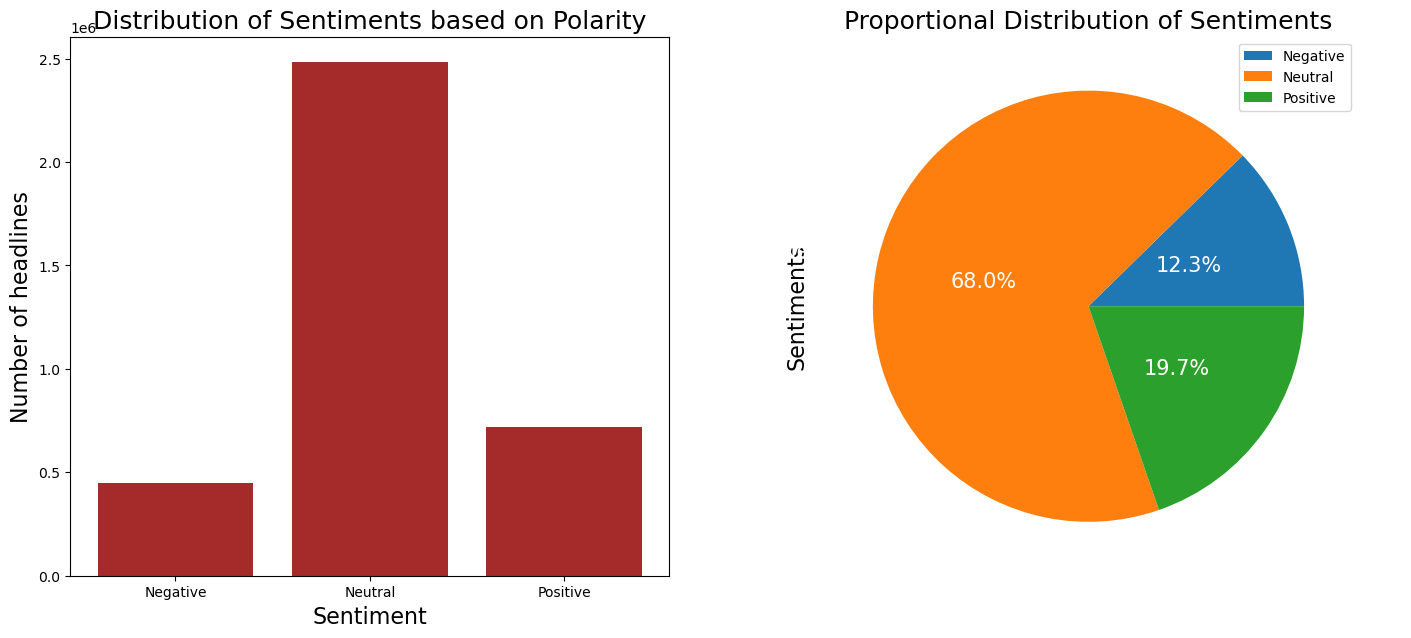

In [25]:
# Plotting the Count and Proportional Distribution of reviews based on sentiment as per polarity
plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)

# Plotting the count of reviews for each sentiment
plt.bar(['Negative', 'Neutral', 'Positive'], [len(news_df[news_df['polarity'] < 0]), len(news_df[news_df['polarity'] == 0]), 
                                              len(news_df[news_df['polarity'] > 0])], color='brown')
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Number of headlines', fontsize=16)
plt.title('Distribution of Sentiments based on Polarity', fontsize=18)

plt.subplot(1, 2, 2)

# Plotting the proportional distribution of sentiments
plt.pie(x=[len(news_df[news_df['polarity'] < 0]), len(news_df[news_df['polarity'] == 0]),
           len(news_df[news_df['polarity'] > 0])], 
        labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', pctdistance=0.5,
        textprops={'fontsize':15, 'color':'white'})
plt.ylabel('Sentiments', fontsize=16)
plt.title('Proportional Distribution of Sentiments', fontsize=18)
plt.legend()

**Observations:**


- 19.7% headlines are positive, while only 12.3% are negative.
- The majority, 68.0%, have a neutral sentiment.
- Neutral headlines dominate, suggesting balanced or less emotionally charged language overall.
- Positive headlines are more frequent than negative ones.
- This distribution indicates a trend toward neutral or positively framed news..

# How are the Subjectivity values distributed for the Headlines?

Text(0.5, 1.0, 'Distribution of Subjectivity Values')

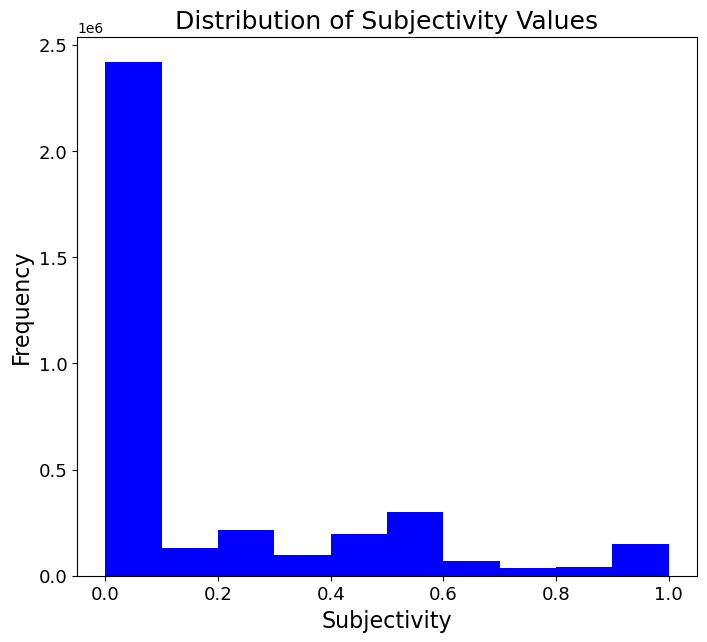

In [26]:
plt.figure(figsize=(8, 7))
news_df['subjectivity'].plot(kind='hist', color='blue', fontsize=13)
plt.xlabel('Subjectivity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Subjectivity Values', fontsize=18)

# Loading the Stock Data :

In [27]:
import yfinance as yf

In [28]:
bse_df =yf.download('^BSESN', start='2016-01-04', end='2020-07-30')

[*********************100%***********************]  1 of 1 completed


In [29]:
#checking the shape of the bse data
bse_df.shape

(1122, 6)

In [30]:
bse_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900


# Data Information :

In [31]:
bse_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1122 entries, 2016-01-04 to 2020-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1122 non-null   float64
 1   High       1122 non-null   float64
 2   Low        1122 non-null   float64
 3   Close      1122 non-null   float64
 4   Adj Close  1122 non-null   float64
 5   Volume     1122 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 61.4 KB


In [32]:
bse_df = bse_df[['Close']]
bse_df

,Close
Date,
2016-01-04,25623.349609
2016-01-05,25580.339844
2016-01-06,25406.330078
2016-01-07,24851.830078
2016-01-08,24934.330078
...,...
2020-07-23,38140.468750
2020-07-24,38128.898438
2020-07-27,37934.730469


# EDA :

<AxesSubplot:xlabel='Date', ylabel='Close'>

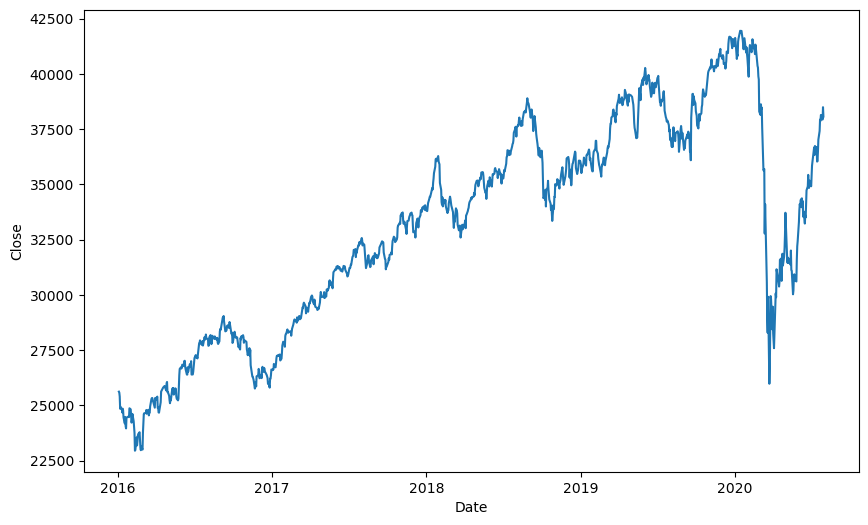

In [33]:
#Plotting the closing price

index = bse_df.index

plt.figure(figsize = (10,6))
sns.lineplot(x = index, y = bse_df['Close'])

# Data Preprocessing :

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(bse_df)

In [35]:
#Splitting the data

train = 0.8
len_train_data = round(len(bse_df) * train)

train_data = scaled_data[0 : len_train_data]
test_data = scaled_data[len_train_data :]

In [36]:
# The shape of training data and testing data

train_data.shape, test_data.shape

((898, 1), (224, 1))

In [37]:
def feature_extraction(data, start, end):
    x_train = []
    y_train=[]
    for i in range(start,end):
        x_train.append(data[i-50:i])
        y_train.append(data[i])
    return x_train, y_train

In [38]:
#Creating training data

x_train, y_train = feature_extraction(train_data, 50, len(train_data))

#creating testing data

x_test,y_test = feature_extraction(test_data, 50, len(test_data))

In [39]:
#Converting the list to numpy array

#Training data

x_train = np.array(x_train)
y_train = np.array(y_train)

#Testing data
x_test = np.array(x_test)
y_test = np.array(y_test)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(848, 50, 1)
(174, 50, 1)
(848, 1)
(174, 1)


In [41]:
#train dataframe
train_df = pd.DataFrame(scaler.inverse_transform(x_train.reshape(-1, 50)), 
                        index = np.arange(0, len(x_train)))
train_df['target'] = scaler.inverse_transform(y_train)
train_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,25623.349609,25580.339844,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,...,24242.980469,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469
1,25580.339844,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,...,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141
2,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,...,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234
3,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,...,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234,25285.369141
4,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,23962.210937,...,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234,25285.369141,25330.490234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,39784.519531,39950.460937,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,...,36976.851562,36690.500000,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094
844,39950.460937,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,...,36690.500000,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688
845,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,39434.941406,...,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688,36701.160156
846,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,39434.941406,39592.078125,...,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688,36701.160156,37494.121094


In [42]:
#test dataframe
test_df = pd.DataFrame(scaler.inverse_transform(x_test.reshape(-1, 50)),
                       index = np.arange(len(x_train), len(x_train) + len(x_test)))
test_df['target'] = scaler.inverse_transform(y_test)
test_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
848,37451.839844,37068.929688,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,...,40165.031250,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406
849,37068.929688,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,...,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406
850,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,...,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219
851,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,...,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219,40651.640625
852,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,36563.878906,...,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219,40651.640625,40575.171875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,32008.609375,31122.890625,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,...,36594.328125,36693.691406,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750
1018,31122.890625,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,...,36693.691406,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438
1019,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,32424.099609,...,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438,37934.730469
1020,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,32424.099609,33303.519531,...,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438,37934.730469,38492.949219


# Model Building :

In [43]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
model = keras.Sequential()

model.add(keras.layers.LSTM(units = 384, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(keras.layers.LSTM(units = 384, return_sequences = True))
model.add(keras.layers.LSTM(units = 384, return_sequences = True))
model.add(keras.layers.LSTM(units = 384, return_sequences = False))
model.add(keras.layers.Dense(units = 1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 384)           592896    
                                                                 
 lstm_1 (LSTM)               (None, 50, 384)           1181184   
                                                                 
 lstm_2 (LSTM)               (None, 50, 384)           1181184   
                                                                 
 lstm_3 (LSTM)               (None, 384)               1181184   
                                                                 
 dense (Dense)               (None, 1)                 385       
                                                                 
Total params: 4,136,833
Trainable params: 4,136,833
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer = 'adam', loss = 'mse')
callback_chk = keras.callbacks.ModelCheckpoint(filepath = 'best_model.h5', save_best_only = True)
model_history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test), callbacks = [callback_chk])

Epoch 1/30
27/27 [==============================] - 27s 813ms/step - loss: 0.0217 - val_loss: 0.0231
Epoch 2/30
27/27 [==============================] - 21s 771ms/step - loss: 0.0021 - val_loss: 0.0179
Epoch 3/30
27/27 [==============================] - 21s 784ms/step - loss: 0.0016 - val_loss: 0.0147
Epoch 4/30
27/27 [==============================] - 21s 790ms/step - loss: 0.0015 - val_loss: 0.0121
Epoch 5/30
27/27 [==============================] - 21s 784ms/step - loss: 0.0012 - val_loss: 0.0103
Epoch 6/30
27/27 [==============================] - 21s 780ms/step - loss: 0.0012 - val_loss: 0.0093
Epoch 7/30
27/27 [==============================] - 21s 781ms/step - loss: 0.0010 - val_loss: 0.0083
Epoch 8/30
27/27 [==============================] - 21s 787ms/step - loss: 0.0010 - val_loss: 0.0082
Epoch 9/30
27/27 [==============================] - 21s 785ms/step - loss: 0.0012 - val_loss: 0.0089
Epoch 10/30
27/27 [==============================] - 21s 777ms/step - loss: 0.0013 - val_lo

In [46]:
model = keras.models.load_model('best_model.h5')

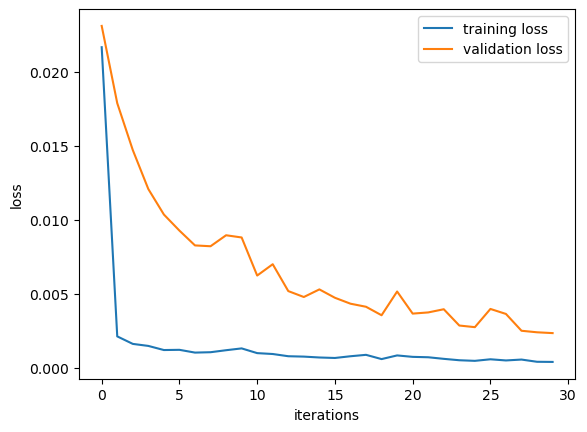

In [47]:
#Plotting the losses

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
index = np.arange(30)

sns.lineplot(x = index, y = loss)
sns.lineplot(x = index, y = val_loss)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend(['training loss','validation loss'])

In [48]:
#predicting on test data
pred_test = model.predict(x_test)

6/6 [==============================] - 2s 213ms/step


In [49]:
#inverse transformation on predictions and actual value

preds_inv = scaler.inverse_transform(pred_test)
y_test_inv = scaler.inverse_transform(y_test)

**Model Evaluation :**

In [50]:
print('MSE : ', mean_squared_error(y_test_inv, preds_inv), end='\n')
print('RMSE : ', np.sqrt(mean_squared_error(y_test_inv, preds_inv)))

MSE :  841956.7103688691
RMSE :  917.5819910879186


In [51]:
R2_score = r2_score(y_test_inv, preds_inv)
print(R2_score)

0.958094789228657


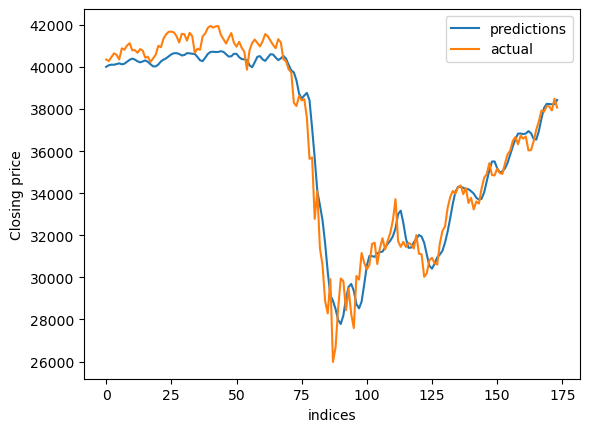

In [52]:
plt.plot(preds_inv)
plt.plot(y_test_inv)

plt.legend(['predictions','actual'])
plt.xlabel('indices')
plt.ylabel('Closing price')
plt.show()

In [55]:
news_df.drop_duplicates(inplace = True)

In [56]:
news_df.reset_index(inplace = True)

In [57]:
news_df.drop(columns = 'index', inplace = True)

In [59]:
df_final = pd.merge(news_df, bse_df, on = "Date", how = 'right')

In [60]:
df_final.head()

,headline_category,headline_text,Date,polarity,subjectivity,Compound,Negative,Neutral,Positive,Close
0,life style health fitness fitness,Surprising facts about exercise sweat,2016-01-04,0.700000,0.5,0.2732,0.000,0.656,0.344,25623.349609
1,life style health fitness home remedies,Bizarre home remedies for the common cold,2016-01-04,-0.166667,0.7,-0.3182,0.277,0.723,0.000,25623.349609
2,life style beauty,How to wear makeup when you're,2016-01-04,0.000000,0.0,0.0000,0.000,1.000,0.000,25623.349609
3,life style relationships parenting,What's your style,2016-01-04,0.000000,0.0,0.0000,0.000,1.000,0.000,25623.349609
4,life style relationships man woman,Bizarre reasons Indians cite for divorce,2016-01-04,0.400000,0.6,-0.3182,0.315,0.685,0.000,25623.349609


<AxesSubplot:>

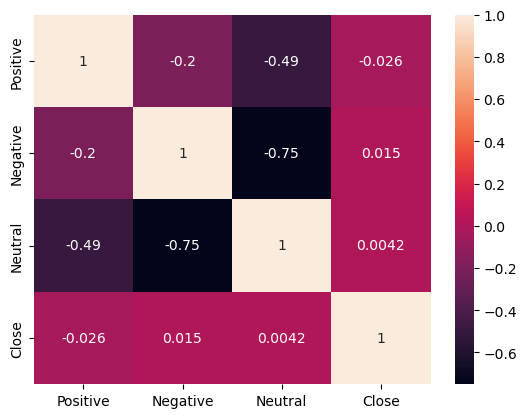

In [69]:
# Plotting Correlation  Matrix

corr_data = df_final[['Positive','Negative','Neutral','Close']].corr()
sns.heatmap(corr_data, annot = True)

**Observation :**


- The sentiment of news headlines tends to have an inverse relationship with stock prices, showing a negative correlation.